<a href="https://colab.research.google.com/github/Ucchwas/Simple_CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
  
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [18]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


import keras
from keras.models import Sequential

from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [19]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [20]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [21]:
classes = np.unique(train_labels)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
nClasses = len(classes)
nClasses

10

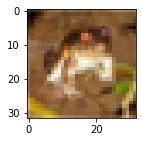

In [23]:
plt.figure(figsize=[4,2])

plt.subplot(111)
plt.imshow(train_images[0,:,:], cmap='gray')

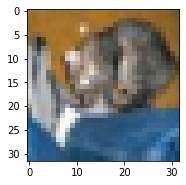

In [24]:
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')

In [25]:
nRows,nCols,nDims= train_images.shape[1:]
train_data= train_images.reshape(train_images.shape[0],nRows,nCols,nDims)
test_data= test_images.reshape(test_images.shape[0],nRows,nCols,nDims)

In [26]:
train_data= train_data.astype('float32') / 255
test_data= test_data.astype('float32') / 255

In [27]:
train_labels_vector= to_categorical(train_labels) #converts to vectors
test_labels_vector= to_categorical(test_labels)

In [28]:
def createModel():
  model= Sequential()
  model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(nRows, nCols, nDims)))
  model.add(Conv2D(32,3,3, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation='softmax'))

  return model

In [29]:
model= createModel()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 64)          36928     
                                                      

In [30]:
history= model.fit(train_data, train_labels_vector, batch_size=128, epochs=50, verbose=1, validation_data=(test_data, test_labels_vector))
model.evaluate(test_data, test_labels_vector)

Epoch 1/50
391/391 [==============================] - 4s 8ms/step - loss: 1.9325 - accuracy: 0.2747 - val_loss: 1.6842 - val_accuracy: 0.3878
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 1.5892 - accuracy: 0.4195 - val_loss: 1.4414 - val_accuracy: 0.4749
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 1.4445 - accuracy: 0.4748 - val_loss: 1.2904 - val_accuracy: 0.5401
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3497 - accuracy: 0.5149 - val_loss: 1.2461 - val_accuracy: 0.5601
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 1.2758 - accuracy: 0.5436 - val_loss: 1.4351 - val_accuracy: 0.5001
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 1.2147 - accuracy: 0.5683 - val_loss: 1.0736 - val_accuracy: 0.6177
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 1.1698 - accuracy: 0.5858 - val_loss: 1.0427 - val_accuracy: 0.6311
Epoch 

[0.870887279510498, 0.7020000219345093]